# ANLY-590 Assignment 2
## Hanlong Peng

## 1. Autoencoder

In [1]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

C:\anaconda3\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)
Using TensorFlow backend.


In [2]:
input_img = Input(shape=(28, 28, 1))

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)


x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [3]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1)) 
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  

In [4]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 69us/step - loss: 0.3534 - val_loss: 0.3187
Epoch 2/50
60000/60000 [==============================] - 3s 54us/step - loss: 0.3079 - val_loss: 0.2996
Epoch 3/50
60000/60000 [==============================] - 3s 54us/step - loss: 0.2988 - val_loss: 0.3020
Epoch 4/50
60000/60000 [==============================] - 3s 54us/step - loss: 0.2939 - val_loss: 0.2920
Epoch 5/50
60000/60000 [==============================] - 3s 54us/step - loss: 0.2908 - val_loss: 0.2926
Epoch 6/50
60000/60000 [==============================] - 3s 54us/step - loss: 0.2882 - val_loss: 0.2892
Epoch 7/50
60000/60000 [==============================] - 3s 54us/step - loss: 0.2863 - val_loss: 0.2875
Epoch 8/50
60000/60000 [==============================] - 3s 54us/step - loss: 0.2848 - val_loss: 0.2878
Epoch 9/50
60000/60000 [==============================] - 3s 54us/step - loss: 0.2835 - val_loss: 0.2841
Epoch

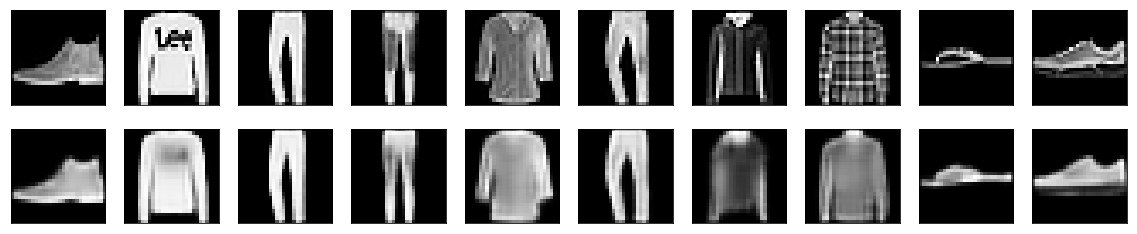

In [5]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n + 1 )
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## 2. Image Classification

### 2.1 Deep CNN

In [6]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [7]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [8]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
#1st Conv layer
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
#1st Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
#2nd Conv layer
model.add(Conv2D(56, kernel_size=(5,5), input_shape=input_shape))
#2nd Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [9]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 9, 9, 56)          39256     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 56)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 896)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               114816    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
__________

In [18]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 6s 103us/step - loss: 0.1317 - acc: 0.9509
Epoch 2/20
60000/60000 [==============================] - 6s 98us/step - loss: 0.1225 - acc: 0.9539
Epoch 3/20
60000/60000 [==============================] - 6s 97us/step - loss: 0.1149 - acc: 0.9570
Epoch 4/20
60000/60000 [==============================] - 6s 97us/step - loss: 0.1086 - acc: 0.9591
Epoch 5/20
60000/60000 [==============================] - 6s 97us/step - loss: 0.1016 - acc: 0.9610
Epoch 6/20
60000/60000 [==============================] - 6s 97us/step - loss: 0.0971 - acc: 0.9631
Epoch 7/20
60000/60000 [==============================] - 6s 98us/step - loss: 0.0909 - acc: 0.9653
Epoch 8/20
60000/60000 [==============================] - 6s 97us/step - loss: 0.0900 - acc: 0.9656
Epoch 9/20
60000/60000 [==============================] - 6s 97us/step - loss: 0.0867 - acc: 0.9677
Epoch 10/20
60000/60000 [==============================] - 6s 97us/step - loss: 0.0831 - acc: 0.968

In [19]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 47us/step


[0.48407428988553586, 0.90139999999999998]

I used 2 convolution layers, 2 pooling layers in the model with different paramters(kernel size and filter size).
The accuracy for our model is 0.90139, and it looks pretty good with couple examples we randomly select.

### 2.2 Transfer Learning

In [20]:
import sys
import numpy as np
import cv2
import sklearn.metrics as sklm

from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.layers import Input, Flatten, Dense
from keras.models import Model, load_model
from keras.datasets import mnist

from keras import backend as K
img_dim_ordering = 'tf'
K.set_image_dim_ordering(img_dim_ordering)

# the model
def pretrained_model(img_shape, num_classes):
    model_vgg16_conv = VGG16(weights='imagenet', include_top=False)
    # Make vgg16 model layers as non trainable
    for layer in model_vgg16_conv.layers:
        layer.trainable = False

    #Create your own input format
    keras_input = Input(shape=img_shape, name = 'image_input')
    
    #Use the generated model 
    output_vgg16_conv = model_vgg16_conv(keras_input)
    
    #Add the fully-connected layers 
    x = Flatten(name='flatten')(output_vgg16_conv)
    x = Dense(256, activation='relu', name='fc1')(x)
    x = Dense(10, activation='softmax', name='predictions')(x)
    
    #Create your own model 
    pretrained_model = Model(inputs=keras_input, outputs=x)
    pretrained_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return pretrained_model

# loading the data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# converting it to RGB
x_train = [cv2.cvtColor(cv2.resize(i, (32,32)), cv2.COLOR_GRAY2BGR) for i in x_train]
x_train = np.concatenate([arr[np.newaxis] for arr in x_train]).astype('float32')

x_test = [cv2.cvtColor(cv2.resize(i, (32,32)), cv2.COLOR_GRAY2BGR) for i in x_test]
x_test = np.concatenate([arr[np.newaxis] for arr in x_test]).astype('float32')

# training the model
model = pretrained_model(x_train.shape[1:], len(set(y_train)))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_input (InputLayer)     (None, 32, 32, 3)         0         
_________________________________________________________________
vgg16 (Model)                multiple                  14714688  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
fc1 (Dense)                  (None, 256)               131328    
_________________________________________________________________
predictions (Dense)          (None, 10)                2570      
Total params: 14,848,586
Trainable params: 133,898
Non-trainable params: 14,714,688
_________________________________________________________________


In [21]:
model.fit(x=x_train,y=y_train, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 17s 290us/step - loss: 0.9408 - acc: 0.7929
Epoch 2/20
60000/60000 [==============================] - 17s 285us/step - loss: 0.4288 - acc: 0.8451
Epoch 3/20
60000/60000 [==============================] - 17s 286us/step - loss: 0.3903 - acc: 0.8578
Epoch 4/20
60000/60000 [==============================] - 17s 288us/step - loss: 0.3717 - acc: 0.8641
Epoch 5/20
60000/60000 [==============================] - 17s 289us/step - loss: 0.3449 - acc: 0.8724
Epoch 6/20
60000/60000 [==============================] - 18s 304us/step - loss: 0.3244 - acc: 0.8800
Epoch 7/20
60000/60000 [==============================] - 18s 301us/step - loss: 0.3071 - acc: 0.8863
Epoch 8/20
60000/60000 [==============================] - 18s 300us/step - loss: 0.2938 - acc: 0.8924
Epoch 9/20
60000/60000 [==============================] - 18s 300us/step - loss: 0.2759 - acc: 0.8964
Epoch 10/20
60000/60000 [==============================] - 18s 297us/step - loss: 

In [22]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 3s 275us/step


[0.70882165284156795, 0.8448]

Since the least dimension for vgg is 32 by 32, we have to convert the shape from 28 by 28 to 32 by 32. The accuracy doesn't change much in this case, but if we take the default dimension of vgg, which is 224 by 224, I think the accuracy would drop significantly due to noise caused by upsampling. 
Another interesting fact is that when we convert mnist to RGB, the pictures are different from the first part. This means that the red, green and blue channels are all the same and is the MNIST grayscale counterpart.

## 3. Text Classification

In [23]:
from keras.preprocessing import sequence
from keras.layers import Dense, SimpleRNN, LSTM, Embedding, Dropout, Bidirectional, Activation, Flatten,GlobalMaxPooling1D
from keras.models import Sequential
import requests
from sklearn.model_selection import train_test_split
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.utils.np_utils import to_categorical

In [24]:
#load and preprocess the data
malicious = requests.get('https://s3.amazonaws.com/anly-590/url-classification/malicious-urls.txt').text.split('\n')
benign = requests.get('https://s3.amazonaws.com/anly-590/url-classification/benign-urls.txt').text.split('\n')
x = malicious + benign
y = [0 for _ in range(len(benign))]+[1 for _ in range(len(malicious))]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(x_train)
sequences = tok.texts_to_sequences(x_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)
test_sequences = tok.texts_to_sequences(x_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

### 3.1 RNN

In [25]:
rnn_model = Sequential()
rnn_model.add(Embedding(1000, 64))
rnn_model.add(SimpleRNN(32))
rnn_model.add(Dense(1, activation='sigmoid'))

In [26]:
rnn_model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])

In [27]:
rnn_model.fit(sequences_matrix, y_train, epochs=10, batch_size=256)

Epoch 1/10
60618/60618 [==============================] - 9s 147us/step - loss: 0.0517 - acc: 0.9900
Epoch 2/10
60618/60618 [==============================] - 9s 143us/step - loss: 0.0167 - acc: 0.9947
Epoch 3/10
60618/60618 [==============================] - 9s 143us/step - loss: 0.0161 - acc: 0.9948
Epoch 4/10
60618/60618 [==============================] - 9s 143us/step - loss: 0.0158 - acc: 0.9948
Epoch 5/10
60618/60618 [==============================] - 9s 142us/step - loss: 0.0158 - acc: 0.9948
Epoch 6/10
60618/60618 [==============================] - 9s 142us/step - loss: 0.0157 - acc: 0.9949
Epoch 7/10
60618/60618 [==============================] - 9s 144us/step - loss: 0.0156 - acc: 0.9948
Epoch 8/10
60618/60618 [==============================] - 9s 144us/step - loss: 0.0155 - acc: 0.9949
Epoch 9/10
60618/60618 [==============================] - 9s 142us/step - loss: 0.0155 - acc: 0.9949
Epoch 10/10
60618/60618 [==============================] - 9s 144us/step - loss: 0.0154 - a

In [28]:
rnn_model.evaluate(test_sequences_matrix,y_test)

6736/6736 [==============================] - 2s 280us/step


[0.016357106451453107, 0.99480403800475059]

### 3.2 CNN

In [29]:
y_train_cnn = to_categorical(y_train, num_classes = 2)
y_test_cnn = to_categorical(y_test, num_classes = 2)

  
cnn_model = Sequential()
cnn_model.add(Embedding(max_words, 64))
cnn_model.add(Conv1D(64,5,activation='relu'))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(64,activation='relu'))
cnn_model.add(Dense(2,activation='sigmoid'))
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 64)          64000     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 64)          20544     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 64)                0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 130       
Total params: 88,834
Trainable params: 88,834
Non-trainable params: 0
_________________________________________________________________


In [30]:
cnn_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])

cnn_model.fit(sequences_matrix, y_train_cnn, batch_size=256, epochs=10)

Epoch 1/10
60618/60618 [==============================] - 2s 33us/step - loss: 0.0957 - acc: 0.9835
Epoch 2/10
60618/60618 [==============================] - 2s 26us/step - loss: 0.0176 - acc: 0.9943
Epoch 3/10
60618/60618 [==============================] - 2s 25us/step - loss: 0.0162 - acc: 0.9944
Epoch 4/10
60618/60618 [==============================] - 2s 25us/step - loss: 0.0156 - acc: 0.9947
Epoch 5/10
60618/60618 [==============================] - 2s 25us/step - loss: 0.0154 - acc: 0.9948
Epoch 6/10
60618/60618 [==============================] - 2s 26us/step - loss: 0.0154 - acc: 0.9948
Epoch 7/10
60618/60618 [==============================] - 2s 26us/step - loss: 0.0151 - acc: 0.9948
Epoch 8/10
60618/60618 [==============================] - 2s 25us/step - loss: 0.0150 - acc: 0.9949
Epoch 9/10
60618/60618 [==============================] - 2s 25us/step - loss: 0.0149 - acc: 0.9949
Epoch 10/10
60618/60618 [==============================] - 2s 25us/step - loss: 0.0149 - acc: 0.9949

In [31]:
cnn_model.evaluate(test_sequences_matrix,y_test_cnn)

6736/6736 [==============================] - 0s 62us/step


[0.016585523360895627, 0.99480403800475059]

### 3.3 ROC

In [32]:

from sklearn.metrics import roc_curve
y_pred_rnn = rnn_model.predict(test_sequences_matrix).ravel()
fpr_rnn, tpr_rnn, thresholds_rnn = roc_curve(y_test, y_pred_rnn)


In [33]:

y_pred_cnn = cnn_model.predict(test_sequences_matrix).ravel()
y_test_cnn = np.array(y_test_cnn).flatten()
fpr_cnn, tpr_cnn, thresholds_cnn = roc_curve(y_test_cnn, y_pred_cnn)




In [34]:
from sklearn.metrics import auc
auc_cnn = auc(fpr_cnn, tpr_cnn)
auc_rnn = auc(fpr_rnn, tpr_rnn)

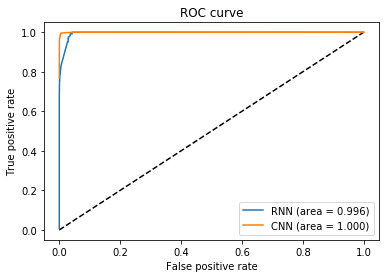

In [35]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rnn, tpr_rnn, label='RNN (area = {:.3f})'.format(auc_rnn))
plt.plot(fpr_cnn, tpr_cnn, label='CNN (area = {:.3f})'.format(auc_cnn))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

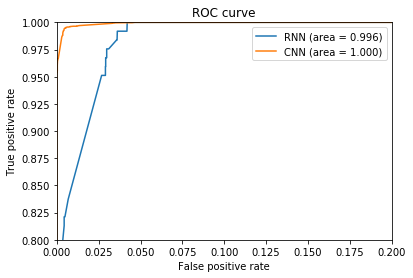

In [36]:
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rnn, tpr_rnn, label='RNN (area = {:.3f})'.format(auc_rnn))
plt.plot(fpr_cnn, tpr_cnn, label='CNN (area = {:.3f})'.format(auc_cnn))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()